Импортируем нужные библиотеки и подготавливаем датасет

In [792]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as ss

from collections import Counter
import math

In [793]:
df = pd.read_csv("phoneCost-train.csv").drop_duplicates()
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Очень много различных значений. Удобно будет если разделить их на классы, например, округлив. Диаграммы будут выглядеть лучше.

In [795]:
def roundate(num, x):
    num = float(num)
    num /= 10**x
    num = round(num,0)
    num *= 10**x
    return str(int(num))

def roundate_custom(num, p):
    num = float(num)
    num /= p
    num = round(num,0)
    num *= p
    return str(int(num))

listX = [['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
         'n_cores','pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
         'wifi', 'price_range']]
with open('phoneCost-train.csv') as f:
    reader = csv.reader(f)
    for row in reader:
      tmp = row[0]
      if tmp.isdigit():
          row[0] = roundate(row[0], 2)
          if int(row[6]) > 4:
              row[6] = str(int(roundate_custom(row[6], 2)))
          row[8] = roundate(row[8], 1)
          row[11] = roundate(row[11], 2)
          row[12] = roundate(row[12], 2)
          row[13] = roundate(row[13], 2)
          listX.append(row)

In [797]:
with open('phoneCost_new.csv', 'w') as f:
    writer = csv.writer(f)
    for row in listX:
        writer.writerow(row)

PermissionError: [Errno 13] Permission denied: 'phoneCost_new.csv'

In [799]:
df = pd.read_csv('phoneCost_new.csv')

def binary(t, x):
    if t >= x:
        return 1
    else:
        return 0

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,800,0,2.2,0,1,0,8,0.6,190,2,...,0,800,2500,9,7,19,0,0,1,1
1,1000,1,0.5,1,0,1,52,0.7,140,3,...,900,2000,2600,17,3,7,1,1,0,2
2,600,1,0.5,1,2,1,40,0.9,140,5,...,1300,1700,2600,11,2,9,1,1,0,2
3,600,1,2.5,0,0,0,10,0.8,130,6,...,1200,1800,2800,16,8,11,1,0,0,2
4,1800,1,1.2,0,13,1,44,0.6,140,2,...,1200,1200,1400,8,2,15,1,1,0,1


In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Пишем функции для работы с хитмапами

In [801]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def apply(df, f):
    n = df.shape[1]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = f(df[df.columns[i]], df[df.columns[j]])
    ndf = pd.DataFrame(mat, index=df.columns, columns=df.columns)
    return ndf

Вот они, наши хитмапы! На них показывается зависимость одних аттрибутов от других. Чем ярче цвет, тем больше зависимость. Очевидно, что один и тот же аттрибут больше всего зависит от себя самого.

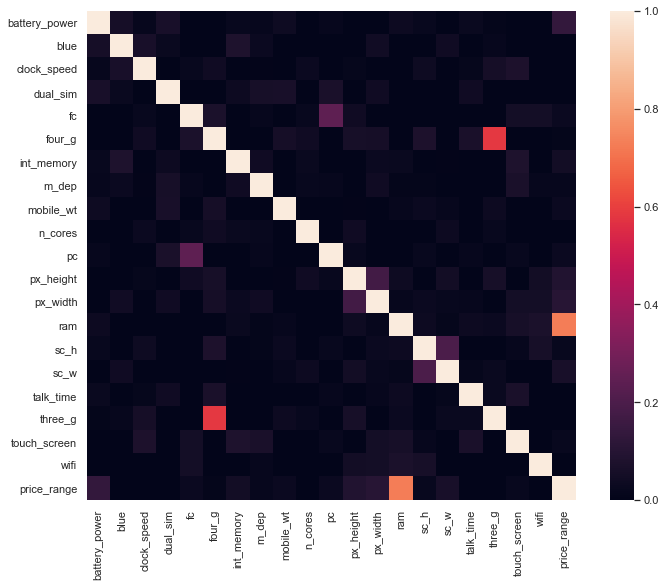

In [802]:
cramers_v_mat = apply(df, cramers_v)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cramers_v_mat, vmax=1.0, square=True);

In [803]:
row = cramers_v_mat.iloc[20]
row.sort_values(axis='index', ascending=False)

price_range      1.000000
ram              0.728298
battery_power    0.134059
px_width         0.104245
px_height        0.088845
sc_w             0.064557
int_memory       0.049101
pc               0.030227
mobile_wt        0.030146
fc               0.028218
sc_h             0.022923
touch_screen     0.020965
m_dep            0.016922
four_g           0.009446
wifi             0.000000
n_cores          0.000000
talk_time        0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
three_g          0.000000
Name: price_range, dtype: float64

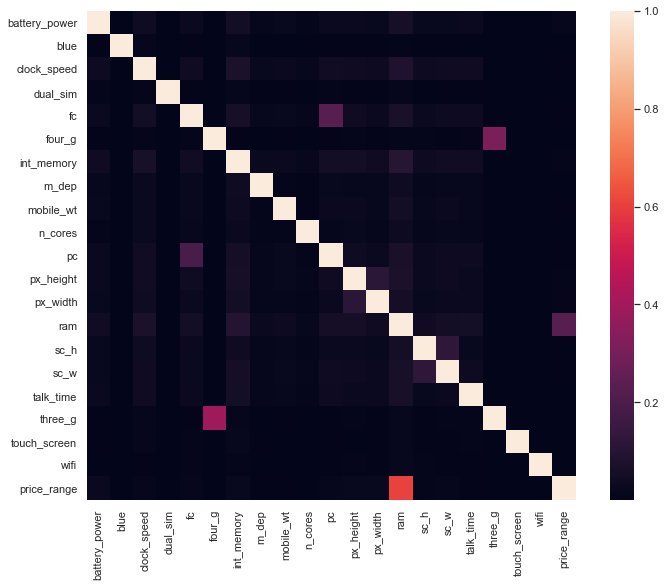

In [804]:
theils_u_mat = apply(df, theils_u)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(theils_u_mat, vmax=1.0, square=True);

Как мы видим, цена телефона очень сильно зависит от объема оперативной памяти. Также, есть небольшая зависимость от мощности батареи, длины и ширины экрана и памяти.

In [805]:
row = theils_u_mat.iloc[20]
row.sort_values(axis='index', ascending=False)

price_range      1.000000
ram              0.606206
battery_power    0.028431
px_height        0.021079
int_memory       0.020152
px_width         0.019861
sc_w             0.015301
pc               0.011932
fc               0.011919
clock_speed      0.011866
sc_h             0.008028
mobile_wt        0.007467
talk_time        0.006837
m_dep            0.005248
n_cores          0.003709
touch_screen     0.000700
four_g           0.000574
blue             0.000258
three_g          0.000247
dual_sim         0.000232
wifi             0.000154
Name: price_range, dtype: float64

Строим графики. Цена подразделена на 4 категории:  
0 - дешево  
1 - средняя стоимость  
2 - дорого  
3 - очень дорого

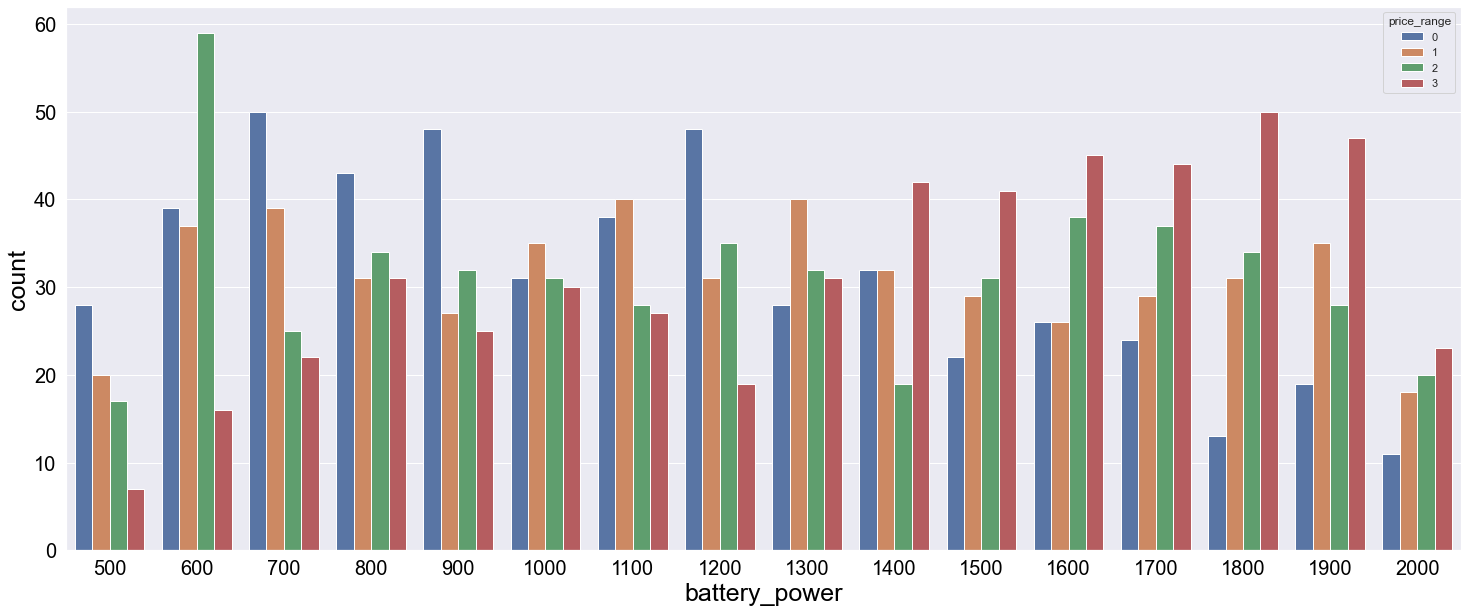

In [806]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='battery_power',hue='price_range',data=df)

plt.xlabel("battery_power", color='black', size=25)
plt.ylabel("count", color='black', size=25)
plt.xticks(color='black', size=20)
plt.yticks(color='black', size=20)

plt.show()

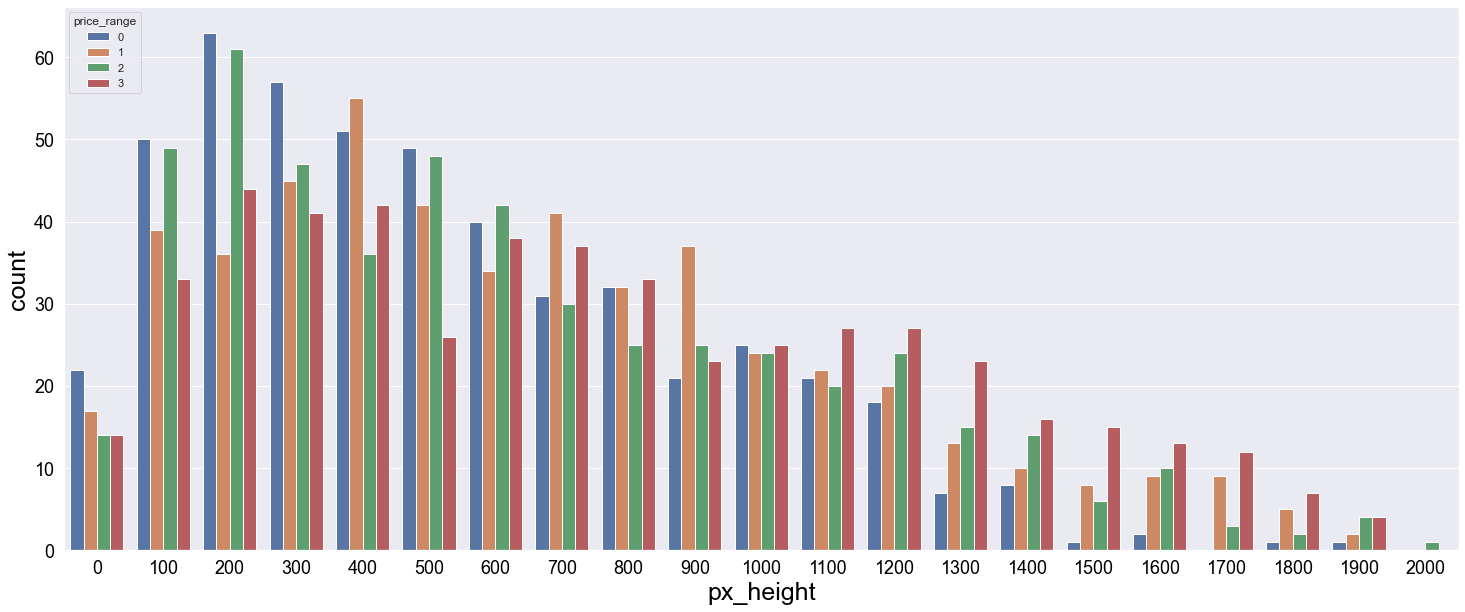

In [807]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='px_height',hue='price_range',data=df)

plt.xlabel("px_height", color='black', size=25)
plt.ylabel("count", color='black', size=25)
plt.xticks(color='black', size=18)
plt.yticks(color='black', size=18)

plt.show()

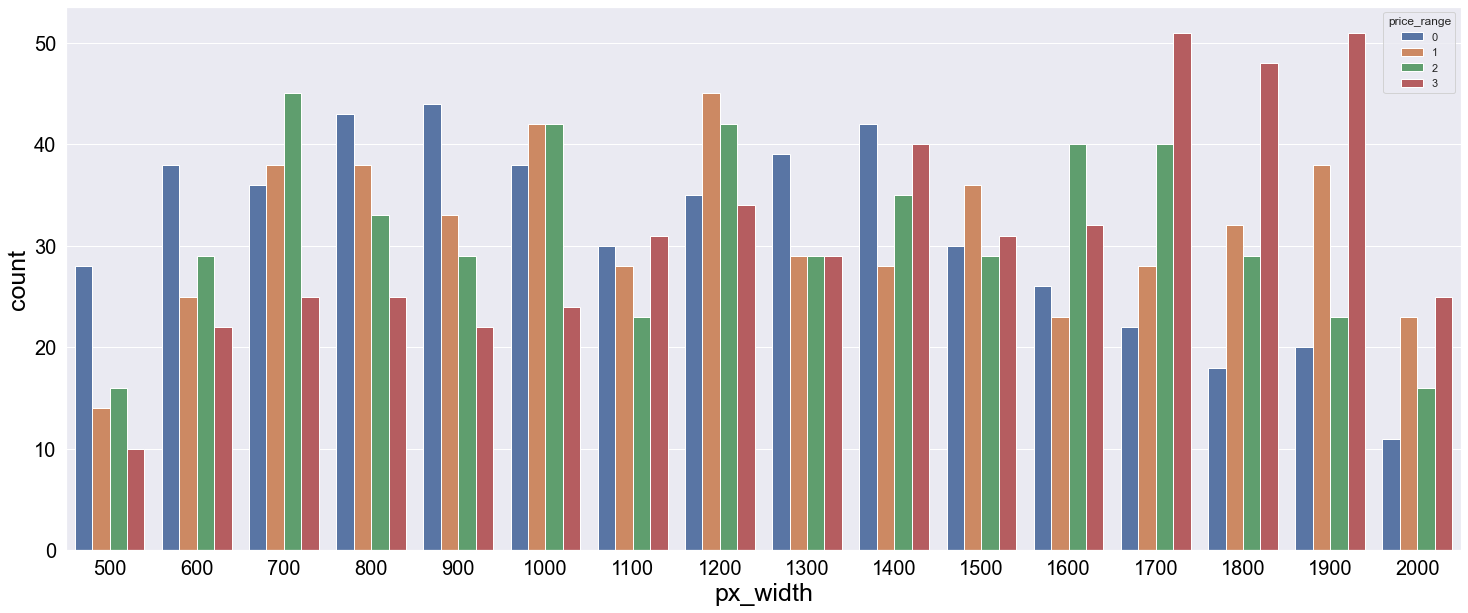

In [808]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='px_width',hue='price_range',data=df)

plt.xlabel("px_width", color='black', size=25)
plt.ylabel("count", color='black', size=25)
plt.xticks(color='black', size=20)
plt.yticks(color='black', size=20)

plt.show()

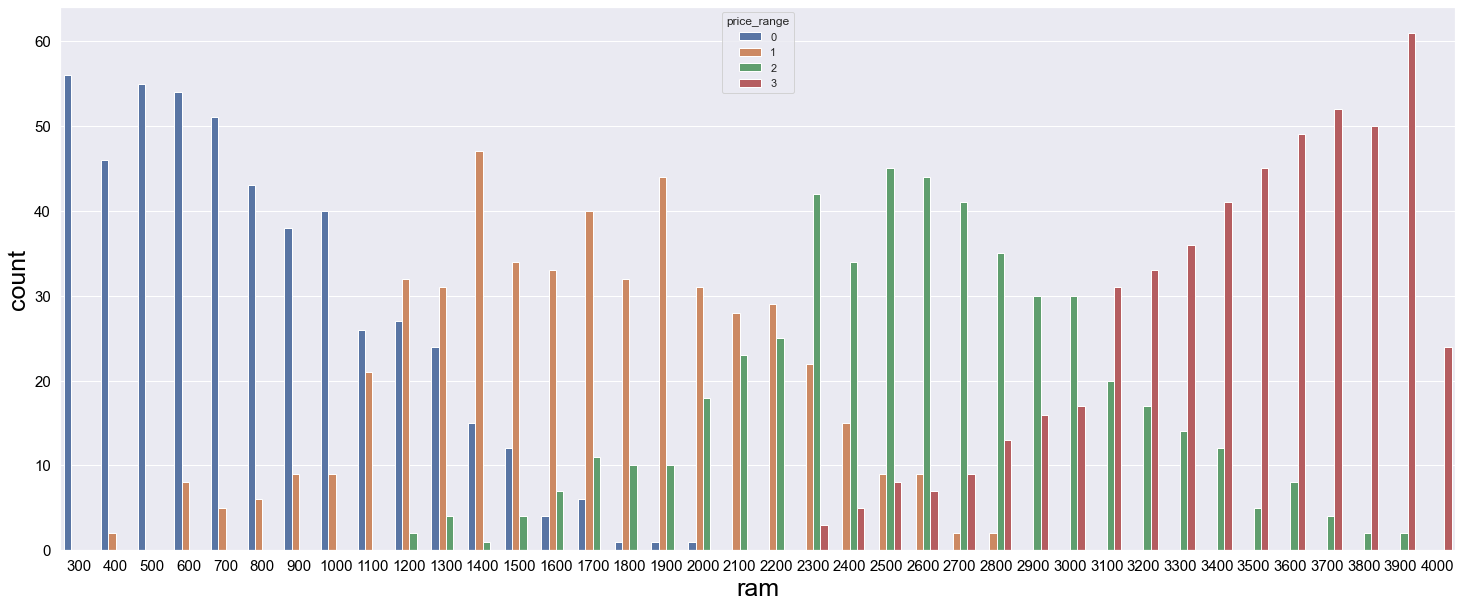

In [809]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='ram',hue='price_range',data=df)

plt.xlabel("ram", color='black', size=25)
plt.ylabel("count", color='black', size=25)
plt.xticks(color='black', size=15)
plt.yticks(color='black', size=15)

plt.show()

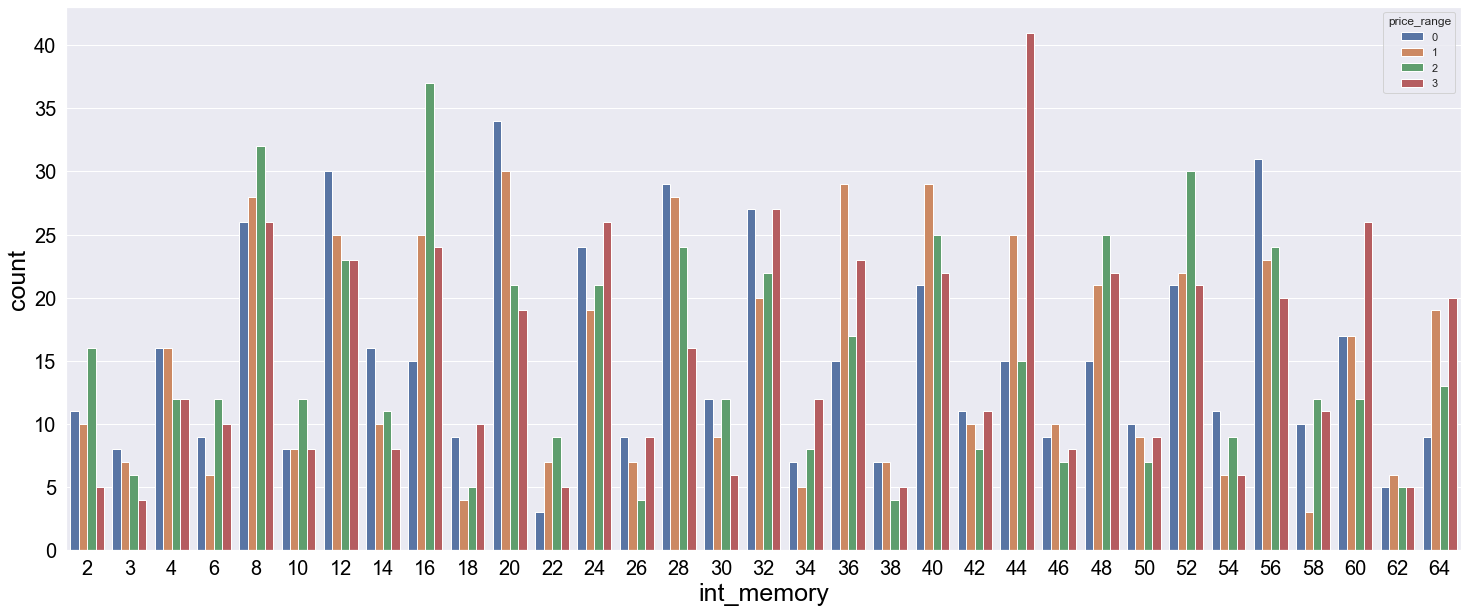

In [810]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='int_memory',hue='price_range',data=df)

plt.xlabel("int_memory", color='black', size=25)
plt.ylabel("count", color='black', size=25)
plt.xticks(color='black', size=20)
plt.yticks(color='black', size=20)

plt.show()

Мы разобрались с данными. Теперь можно и приступить реализовывать саму нейросеть и обучение!  
Возьмем только самые важные параметры для обучения, которые влияют на цену больше всего.  

Так как большинство алгоритмов работают только с бинарными категориями, мы преобразуем колонку цены в 4 разных аттрибута  
Этот аттрибут показывает 1, если телефон принадлежит к данной ценевой категории

In [1156]:
#Лабораторная 2 - уже будем делать саму нейросеть и обучать модели

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

best_cols = ['ram', 'battery_power', 'px_height', 'px_width', 'int_memory']

x = pd.get_dummies(df[best_cols])

y0 = df['price_range'].map({0 : 1, 1 : 0, 2 : 0, 3 : 0}).to_numpy()
y1 = df['price_range'].map({0 : 0, 1 : 1, 2 : 0, 3 : 0}).to_numpy()
y2 = df['price_range'].map({0 : 0, 1 : 0, 2 : 1, 3 : 0}).to_numpy()
y3 = df['price_range'].map({0 : 0, 1 : 0, 2 : 0, 3 : 1}).to_numpy()

y = df['price_range'].to_numpy()


MinMax = MinMaxScaler()

x = MinMax.fit_transform(x.to_numpy()) 



In [1168]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn import linear_model

from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import check_random_state

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Логистическая регрессия
Идем 4 раза по алгоритму логистической регрессии для каждой категории. Вместо бинарного ответа, мы выводим от 0 до 1 вещественный тип. Потом определяем, при какой категории это значение наибольшее - к такой категории и будет относиться телефон.

In [1000]:
class LogRegression():
    
    def __init__(self):
        self.lr = 7
        self.iters = 1024
        
    def add_ones(self, x):
        return np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, x, y):
        
        x = self.add_ones(x)
        self.w = np.zeros(x.shape[1]) #веса
        
        for i in range(self.iters):
            h = self.sigmoid(np.dot(x, self.w))
            grad = np.dot(x.T, (h - y)) / y.size
            self.w -= self.lr * grad
    
    def predict(self, x):
        x = self.add_ones(x)
        xW = np.dot(x, self.w)
        return self.sigmoid(xW)
    
    def predictCW(self, x, ws):
        x = self.add_ones(x)
        xW = np.dot(x, ws)
        return self.sigmoid(xW)

In [1070]:
def maxClassedArrs(a, b, c, d):
    newAr = np.zeros(a.shape)
    for i in range(newAr.size):
        newAr[i] = maxClassed(a[i], b[i], c[i], d[i])
    return newAr


def maxClassed(a, b, c, d):
    if (a >= b and a >= c and a >= d):
        return 0
    elif (b >= c and b >= d):
        return 1
    elif (c >= d):
        return 2
    else:
        return 3




def print_res(clf, X, y, y0, y1, y2, y3, typ='noFlag', k_folds=5, average='macro'):
    
    kf = StratifiedKFold(n_splits=k_folds, random_state=256, shuffle=True)
    precision = np.zeros(k_folds) 
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        # numpy required in case of algos realisation
        X_train = X[train_index]
        y0_train = y0[train_index]
        y1_train = y1[train_index]
        y2_train = y2[train_index]
        y3_train = y3[train_index]


        
        X_val, y_val = X[val_index], y[val_index]

        
        clf.fit(X_train, y0_train)
        y_pred0 = clf.predict(X_val)
        if (typ == "logR"):
            w0 = clf.w
        
        clf.fit(X_train, y1_train)
        y_pred1 = clf.predict(X_val)
        if (typ == "logR"):
            w1 = clf.w
        
        clf.fit(X_train, y2_train)
        y_pred2 = clf.predict(X_val)
        if (typ == "logR"):
            w2 = clf.w
        
        clf.fit(X_train, y3_train)
        y_pred3 = clf.predict(X_val)
        if (typ == "logR"):
            w3 = clf.w
        
        y_pred = maxClassedArrs(y_pred0, y_pred1, y_pred2, y_pred3)
 
        
        precision[i] = precision_score(y_val, y_pred, average=average)
        
    if (typ == "logR"):
        return precision, w0, w1, w2, w3
    else:
        return precision


def print_res2(clf, X, y, k_folds=5, average='macro'):
    
    kf = StratifiedKFold(n_splits=k_folds, random_state=256, shuffle=True)
    precision = np.zeros(k_folds) 
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        # numpy required in case of algos realisation
        X_train = X[train_index]
        y_train = y[train_index]

        X_val, y_val = X[val_index], y[val_index]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        
        precision[i] = precision_score(y_val, y_pred, average=average)
    return precision




Как мы видим, моя реализация работает немного хуже той, что в библиотеке. Но результат все равно довольно неплохой, 86% успеха правильно определить категорию. Скорее всего, логистическая мультиномиальная регрессия намного сложнее, чем я попробовал описать, поэтому, и точность уже встроенной программы больше.

In [1012]:

mulLR = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x, y)
ansPrec = print_res2(mulLR, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansPrec.mean(), ansPrec.std() * 2))


mulLRmy = LogRegression()
ansPrec2 = print_res(mulLRmy, x, y, y0, y1, y2, y3, "logR")
print("Precision score: %0.5f (+/- %0.5f)" % (ansPrec2[0].mean(), ansPrec2[0].std() * 2))

Precision score: 0.93727 (+/- 0.02140)
Precision score: 0.86106 (+/- 0.04268)


Можно придумать и свои примеры, и посмотреть, как нейросеть определит цену придуманных телефонов.

In [1013]:
#Придумаем свои примеры
with open('myDB.csv', 'w') as myfile:
    wr = csv.writer(myfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    wr.writerow(['ram', 'battery_power', 'px_height', 'px_width', 'int_memory'])
    wr.writerow([3100, 1900, 900, 1600, 36])
    wr.writerow([2400, 1600, 1000, 1800, 32])
    wr.writerow([2200, 1800, 800, 1200, 30])
    wr.writerow([2000, 1900, 700, 1300, 32])
    wr.writerow([3300, 1100, 800, 1500, 32])
    wr.writerow([2900, 1200, 1000, 1400, 24])
    wr.writerow([2100, 1000, 600, 1200, 28])
    wr.writerow([2500, 900, 600, 1200, 32])
    wr.writerow([700, 1700, 500, 800, 16])
    wr.writerow([600, 1900, 800, 1200, 20])
    wr.writerow([300, 500, 0, 500, 2]) #worst phone ever
    wr.writerow([4000, 2000, 2000, 2000, 64]) #best phone ever
    
myDF = pd.read_csv("myDB.csv").drop_duplicates()   

best_cols = ['ram', 'battery_power', 'px_height', 'px_width', 'int_memory']

xNew = pd.get_dummies(myDF[best_cols])
print(xNew)

MinMax = MinMaxScaler()

xNew = MinMax.fit_transform(xNew.to_numpy()) 


     ram  battery_power  px_height  px_width  int_memory
0   3100           1900        900      1600          36
1   2400           1600       1000      1800          32
2   2200           1800        800      1200          30
3   2000           1900        700      1300          32
4   3300           1100        800      1500          32
5   2900           1200       1000      1400          24
6   2100           1000        600      1200          28
7   2500            900        600      1200          32
8    700           1700        500       800          16
9    600           1900        800      1200          20
10   300            500          0       500           2
11  4000           2000       2000      2000          64


Вроде неплохо

In [1015]:
print("Prices:")

clf = LogRegression()

w0 = ansPrec2[1]
w1 = ansPrec2[2]
w2 = ansPrec2[3]
w3 = ansPrec2[4]


y_pred0 = clf.predictCW(xNew, w0)
        
y_pred1 = clf.predictCW(xNew, w1)
        
y_pred2 = clf.predictCW(xNew, w2)
        
y_pred3 = clf.predictCW(xNew, w3)


y_pred = maxClassedArrs(y_pred0, y_pred1, y_pred2, y_pred3)

print(y_pred)


Prices:
[3. 2. 2. 1. 3. 2. 2. 2. 0. 0. 0. 3.]


# K ближайших соседей
Так же, определяем коэффициент для каждого типа и выбираем наиболее подходящий. Как мы видим, что даже уже встроенная реализация работает не так хорошо, как предыдущий алгоритм. Моя реализация лишь чуть-чуть уступает, меньше 1% разницы в точности.

In [1016]:
class KNN():
    def __init__(self, nbrs=10):
        self.nbrs = nbrs
    
    def fit(self, x, y):
        self.x = x
        self.y = y.reshape((y.shape[0], 1))

    def get_dists(self, p):
        d = self.x - p
        return np.sqrt((d**2).sum(1))

    def predict(self, X):
        n = X.shape[0]
        y_pred = np.zeros((n, 1))
        for i in range(n):
            dist = self.get_dists(X[i])
            
            y_sort = self.y[np.argsort(dist)].flatten()

            if y_sort[:self.nbrs].sum() > self.nbrs / 2:
                y_pred[i] = 1.0
        
        return y_pred

In [1020]:


KNNnotMy = KNeighborsClassifier(n_neighbors=5).fit(x, y)
ansKNN = print_res2(KNNnotMy, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansKNN.mean(), ansKNN.std() * 2))


KNNmy = KNN(nbrs=5)
ansKNN2 = print_res(KNNmy, x, y, y0, y1, y2, y3)
print("Precision score: %0.5f (+/- %0.5f)" % (ansKNN2.mean(), ansKNN2.std() * 2))


Precision score: 0.85037 (+/- 0.02135)
Precision score: 0.84297 (+/- 0.02070)


# Метод опорных векторов  
У меня получилась реализация похуже, чем та, которая уже есть в библиотеке. Но все равно больше 50% правильных ответов, что показывает, что она все же работает. Этот метод я понял совсем плохо и часть кода нашел где-то, но сильно помогло то, что как и в методе логистической регрессии, мы выводим числа, а потом сравниваем для каждой категории. Определение категории немного сложнее, чем выбор одного из 2 вариантов. Библиотечная реализация тут показывает лучший результат, моя же реализация - худший из всех методов.

In [1114]:
class SVM:
    def __init__(self, alpha=0.001, eta=0.1, eps=0.0001, ticks=50):
        self.ticks = ticks
        self.eta = eta
        self.alpha = alpha
        self.eps = eps
        self.prLoss = float('inf')
    
    def fit(self, X, y, verbose=False):
        X = self.extend(np.array(X))
        y = np.array(y)
        
        for i in range(len(y)):
            if y[i] == 0.0:
                y[i] = -1.0

        self.w = np.random.normal(size=X.shape[1])
        
        ticks = 0
        while True:
            loss = 0
            for i, x in enumerate(X):
                margin = y[i] * np.dot(self.w, x)
                if margin >= 1:
                    self.w = self.w - self.eta * self.alpha * self.w / self.ticks
                else:
                    self.w = self.w + self.eta * (y[i] * x - self.alpha * self.w / self.ticks)
                loss += self.soft_margin_loss(x, y[i])
            if ticks == self.ticks or abs(self.prLoss - loss) <= self.eps:
                return
            
            self.prLoss = loss
            ticks += 1
            
    def predict(self, X):
        X_ext = self.extend(np.array(X))
        return np.array([np.dot(self.w, x) for x in X_ext])
    
    def extend(self, x):
        x_extended = np.zeros((x.shape[0], x.shape[1] + 1))
        x_extended[:,:-1] = x
        x_extended[:,-1] = int(1)  
        return x_extended
    
    def hinge_loss(self, x, y):
        return max(0, 1 - y * np.dot(x, self.w))
    
    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.alpha * np.dot(self.w, self.w) / 2

In [1115]:
SVMnm = SVC(kernel='linear').fit(x, y)
ansSVM = print_res2(SVMnm, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansSVM.mean(), ansSVM.std() * 2))



SVMmy = SVM()
ansSVM2 = print_res(SVMmy, x, y, y0, y1, y2, y3)
print()
print("Precision score: %0.5f (+/- %0.5f)" % (ansSVM2.mean(), ansSVM2.std() * 2))

Precision score: 0.94858 (+/- 0.01680)

Precision score: 0.78210 (+/- 0.10343)


# Метод дерева решений  
Признаюсь, что часть кода снова взял где-то. Так как я всю ночь разбираюсь, я успел сильно устать, + времени осталось не так много. Решающие деревья чем-то похожи на экспертные системы, мы проходим по узлам и можно сказать, отвечаем на "вопросы", в которые мы преобразуем данные. Поставив большую глубину, мне удалось получить наибольшую пока что точность - 88%. Примерно такую же (даже чуть ниже, но также зависит от случайных чисел, которые генерируются в реализации) дает точность реализация из библиотеки. И данный метод хорошо работает с несколькими категориями, не приходится решать для каждой категории отдельно.

In [1333]:
class Node():
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTree():
    def __init__(self, max_depth=20, rf=False):
        self.max_depth = max_depth
        self.feature_prun = 0.1
        self.rf = rf

    def fit(self, X, y, max_features=None):
        self.n_classes_ = len(set(y))
        if not self.rf:
            n_features_ = X.shape[1]
        else:
            ind = np.random.choice(X.shape[0], X.shape[0])
            X, y = X[tuple([ind])], y[tuple([ind])]
            if max_features is None:
                n_features_ = np.ceil(np.sqrt(X.shape[1]*4)).astype(int)
            else:
                n_features_ = max_features
                
        self.features_ = np.sort(np.random.choice(X.shape[1], n_features_,
                                                  replace=False))
        self.tree_ = self._grow_tree(X, y, self.rf)

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _best_split(self, X, y, rf):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in self.features_:
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, rf, depth=0):
        num_samples_per_class = [np.sum(y == i)
                                 for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y, rf)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, rf, depth + 1)
                node.right = self._grow_tree(X_right, y_right, rf, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [1328]:
DTreenm = DecisionTreeClassifier().fit(x, y)
ansDTree = print_res2(DTreenm, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansDTree.mean(), ansDTree.std() * 2))


DTreemy = DecisionTree()
ansDTree2 = print_res2(DTreemy, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansDTree2.mean(), ansDTree2.std() * 2))

Precision score: 0.87530 (+/- 0.02849)
Precision score: 0.88077 (+/- 0.02149)


# Метод рандомного леса  
Заключается в многократном решении деревьев решений. Каждый раз генерирует уникальные деревья решений (n_ests - количество деревьев решений). Решает их и выводит наиболее частую категорию. Очень долго разбирался и заметил, что размер выборки очень сильно влияет на результат. Он выбирается изначально в результате корня количества параметров. Также у меня округление вниз было и при размере выборки = 2 показывало очень плохие результаты. В итоге я изменил формулу, сделал округление вверх и умножил на два. Теперь программа работает немного медленнее, но зато дает лучшие результаты - 0.90! Выходит, что для данного датасета - метод случайного леса - лучший.

In [1338]:
class RandomForest():
    def __init__(self, max_depth=15, n_ests=20, max_features=None):
        self.max_depth = max_depth
        self.max_features = max_features
        self.n_ests = n_ests
        self.forest = [None] * n_ests

    def fit(self, X, y):
        for i in range(self.n_ests):
            self.forest[i] = DecisionTree(max_depth=self.max_depth, rf=True) 
            self.forest[i].fit(X, y)

    def predict(self, X):
        most_cmn = np.zeros(X.shape[0])
        preds = np.zeros((self.n_ests, X.shape[0]))
        for i in range(self.n_ests):
            preds[i] = self.forest[i].predict(X)
        for i in range(len(most_cmn)):
            most_cmn[i] = Counter(preds[:, i]).most_common(1)[0][0]
        return most_cmn

In [1339]:
rfLib = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=0).fit(x, y)
ansRF = print_res2(rfLib, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansRF.mean(), ansRF.std() * 2))


rfMy = RandomForest(max_depth=20, n_ests=10)
ansRF2 = print_res2(rfMy, x, y)
print("Precision score: %0.5f (+/- %0.5f)" % (ansRF2.mean(), ansRF2.std() * 2))

Precision score: 0.89634 (+/- 0.02773)
Precision score: 0.90194 (+/- 0.01903)


# Вывод:  
Существует множество различных моделей обучения, алгоритмов, предназначенных для классификации.  
Мне попался более сложный датасет, так как тут классификация не бинарная, а имеет 4 типа.  
Мне удалось решить задачу, опробовав 5 различных методов, и для данной базы данных для определения стоимости телефона по его характеристикам наибольшую точность показал метод случайного леса, который основан на методе дерева решений, который кстати показал 2 по эффективности результат.
Среди этих же алгоритмов, которые были уже вшиты в библиотеку, лучший результат показал самый первый метод - логистической регрессии. У меня реализация оказалась примерно в 2 раза хуже (в библиотечной реализации ошибка ~ 7%, в моей - около 14%). Скорее всего, я просто не совсем понял, как работать с небинарной классификацией, поэтому и результаты такие. Вывод - для каждой задачи наиболее эффективным является свой метод. Для какой-то метод KNN может быть лучшим, для другой - логистическая регрессия, для третьей - SVM, для четвертой - метод дерева решений или лес. Поэтому, стоит опробовать все, и потом уже решить, что лучше всего подходит для обучения. Последние 2 метода довольно долго работают, поэтому иногда можно пренебречь точностью ради более быстрого обучения. Сейчас, я проделаю все то же самое со вторым датасетом, но он будет попроще - в нем бинарная классификация.